In [1]:
import numpy as np

In [2]:
data1 = np.load('./south_93_22_point_MHW_last.npz')
data1.files

['n_events']

In [3]:
MHW_events = data1['n_events'][:]
MHW_events.shape

(41, 41)

In [4]:
MHW_events1 = np.where(MHW_events==0, np.nan, MHW_events)

In [5]:
MHW_events1

array([[ nan,  nan,  nan, ..., 120., 111., 102.],
       [ nan,  nan,  nan, ..., 110., 102.,  96.],
       [ nan,  nan,  nan, ..., 118., 112., 108.],
       ...,
       [106., 105., 100., ..., 129.,  nan,  nan],
       [ 97., 100., 103., ..., 122., 121., 126.],
       [ 99., 101., 100., ..., 108., 112., 123.]])

In [6]:
np.nanmin(MHW_events1)

6.0

In [7]:
np.nanmax(MHW_events1)

156.0

In [8]:
np.nanmean(MHW_events1)

114.83502538071066

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\2101653531.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=0.85)


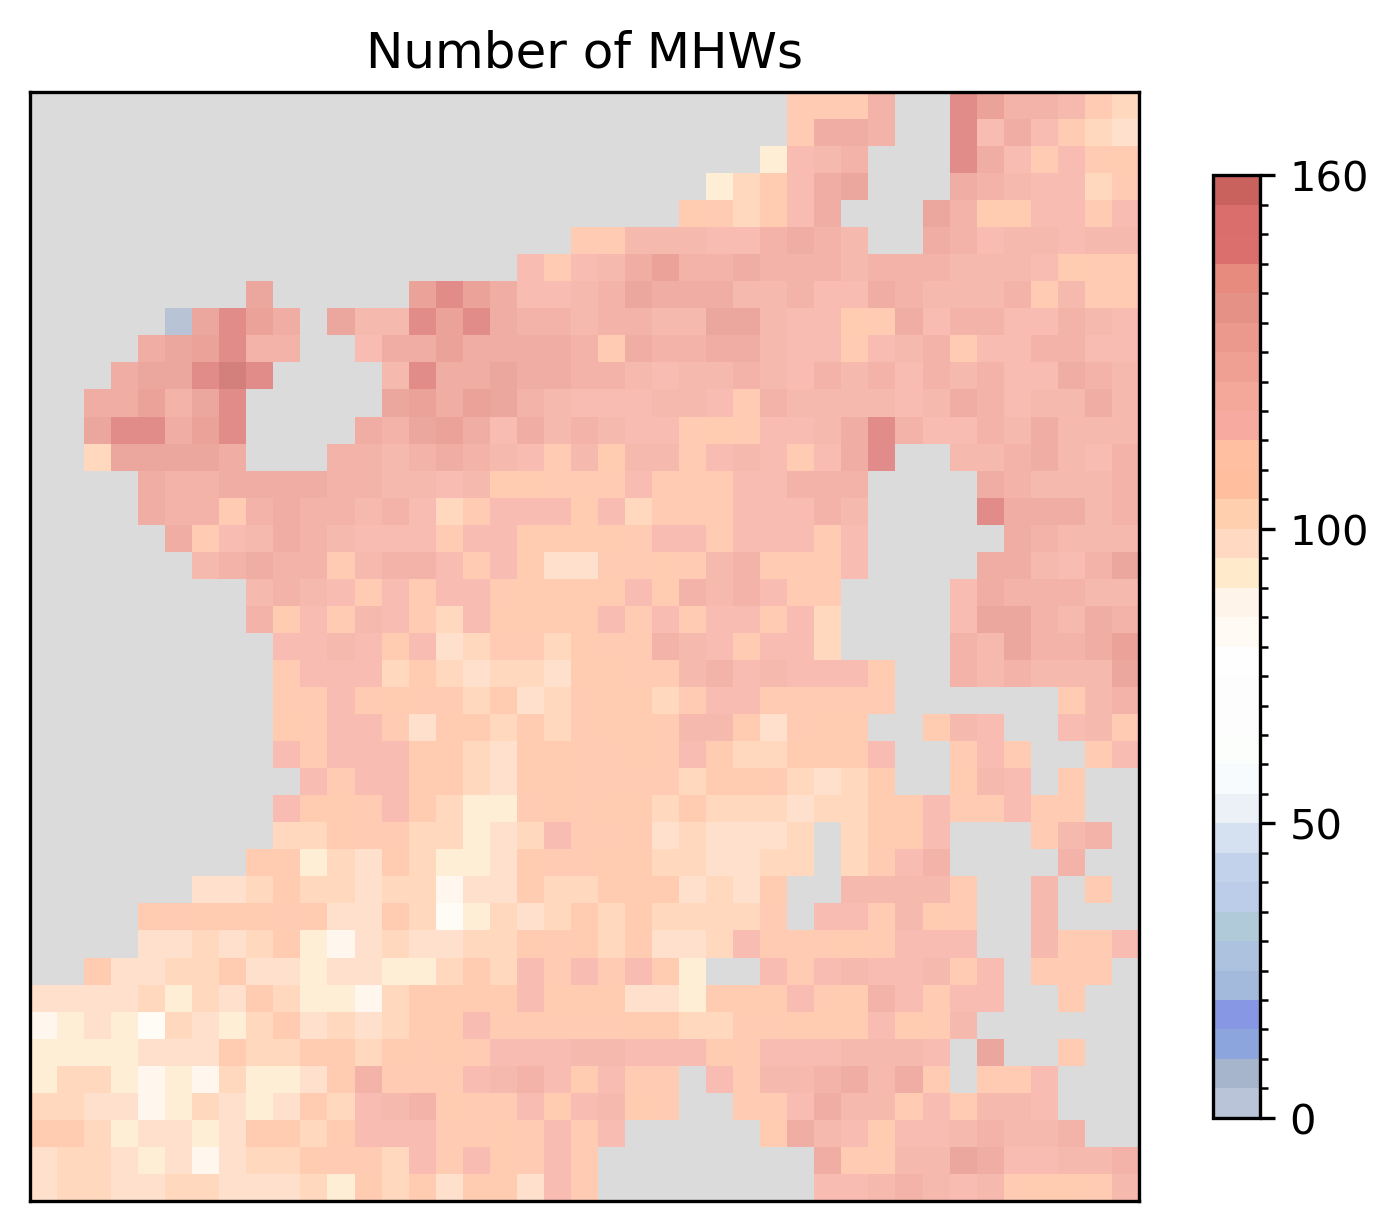

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = MHW_events1

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([0, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                     50, 55, 60, 65, 70, 75, 80,
                     85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135,
                     140, 145, 150, 155,160], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(MHW_events1, cmap=cmap_custom, norm=norm, alpha=0.8)

# Add the color bar with the custom color map

cbar = plt.colorbar(sm, shrink=0.85)
cbar.set_ticks([0,50, 100,  160])  # Optional: Set custom ticks
cbar.set_ticklabels([0,50, 100, 160])  # Optional: Set custom tick labels

# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E'])  
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N']) 
plt.xticks([])
plt.yticks([])
plt.title('Number of MHWs')

# cbar.set_label('℃/day', rotation=0, labelpad=-40) 
# cbar.ax.yaxis.set_label_coords(0.7, -0.03)

plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

In [10]:
data2 = np.load('./temp_diff_clim_93_20_last.npz')
data2.files

['lat', 'lon', 'depth', 'temp_clim_anom']

In [11]:
temp_clim_anom = data2['temp_clim_anom'][:]
temp_clim_anom.shape

(10227, 55, 41, 41)

In [12]:
data3 = np.load('./south_93_22_data_start_end.npz', allow_pickle=True)
data3.files

['date_start', 'date_end']

In [13]:
date_start_raw = data3['date_start'][:]
date_end_raw = data3['date_end'][:]

In [14]:
date_start_raw[0]

array([list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]),
       list([datetime.date(1982, 11, 22), datetime.date(1983, 10, 2), datetime.date(1983, 10, 16), datetime.date(1985, 10, 16), datetime.date(1986, 8, 3), datetime.date(1991, 5, 30), datetime.date(1991, 9, 2), datetime.date(1993, 1, 9), datetime.date(1993, 9, 19), datetime.date(1993, 11, 27), datetime.date(1993, 12, 29), datetime.date(1994, 5, 13), datetime.date(1994, 7, 15), datetime.date(1994, 12, 6), datetime.date(1995, 6, 30), datetime.date(1996, 1, 29), datetime.date(1997, 4, 11), datetime.date(1997, 7, 26), datetime.date(1998, 2, 7), datetime.date(1998, 5, 4), datetime.date(1998, 5, 19), datetime.date(1999, 10, 14), datetime.date(2000, 7, 14), datetime.date(2000, 10, 31)

In [15]:
import datetime
for i in range(41):
    for z in range(41):
        print(i)
        date_start1 = date_start_raw[i,z]  # date_start
        date_end1 = date_end_raw[i,z]  # date_start
  
#         print(date_end1)
        
        def date_to_index(date):
            start_date = datetime.date(1993, 1, 1)  
            delta = date - start_date
            index = delta.days  
            return index

        selected_data = []
        for start, end in zip(date_start1, date_end1):
            start_index = date_to_index(start)
            end_index = date_to_index(end)

            selected_data.append(temp_clim_anom[start_index:end_index+1, :, i, z])
        print(np.array(selected_data).shape)

0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(0,)
0
(111,)
0
(110,)
0
(114,)
0
(129,)
0
(0,)
0
(0,)
0
(145,)
0
(141,)
0
(128,)
0
(127,)
0
(120,)
0
(111,)
0
(102,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(0,)
1
(110,)
1
(131,)
1
(134,)
1
(127,)
1
(0,)
1
(0,)
1
(148,)
1
(115,)
1
(134,)
1
(116,)
1
(110,)
1
(102,)
1
(96,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(0,)
2
(92,)
2
(118,)
2
(124,)
2
(125,)
2
(0,)
2
(0,)
2
(0,)
2
(146,)
2
(134,)
2
(117,)
2
(114,)
2
(118,)
2
(112,)
2
(108,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,)
3
(0,

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\728721103.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(selected_data).shape)


In [16]:
import datetime

selected_data_combined = []

for i in range(41):
    for z in range(41):
        date_start1 = date_start_raw[i, z]  # date_start
        date_end1 = date_end_raw[i, z]  # date_start

        def date_to_index(date):
            start_date = datetime.date(1993, 1, 1)  
            delta = date - start_date
            index = delta.days  
            return index

        selected_data = []
        for start, end in zip(date_start1, date_end1):
            start_index = date_to_index(start)
            end_index = date_to_index(end)

            selected_data.append(temp_clim_anom[start_index:end_index+1, :, i, z])
        
        selected_data_combined.append(selected_data)

selected_data_combined_array = np.array(selected_data_combined)

print(selected_data_combined_array.shape)

(1681,)


C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\331271159.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_data_combined_array = np.array(selected_data_combined)


In [17]:
import datetime
import numpy as np

selected_data_combined = []

# 循环遍历i和z
for i in range(41):
    temp_data_combined = []  
    for z in range(41):
        date_start1 = date_start_raw[i, z]  # date_start
        date_end1 = date_end_raw[i, z]  # date_start

        def date_to_index(date):
            start_date = datetime.date(1993, 1, 1)  
            delta = date - start_date
            index = delta.days  
            return index

        selected_data = []
        for start, end in zip(date_start1, date_end1):
            start_index = date_to_index(start)
            end_index = date_to_index(end)
            selected_data.append(temp_clim_anom[start_index:end_index+1, :, i, z])
        
        temp_data_combined.append(selected_data)

    selected_data_combined.append(temp_data_combined)

selected_data_combined_array = np.array(selected_data_combined)

print(selected_data_combined_array.shape)

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\2367465796.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_data_combined_array = np.array(selected_data_combined)


(41, 41)


In [18]:
last_MHW_data = selected_data_combined_array

In [19]:
last_MHW_data.shape

(41, 41)

In [20]:
data0 = last_MHW_data[0][30]

In [21]:
np.array(data0).shape

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\7635278.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(data0).shape


(114,)

In [22]:
size = np.array(data0).shape

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\2132384672.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  size = np.array(data0).shape


In [23]:
last_MHW_data.shape

(41, 41)

In [27]:
results = [] 

for i in range(41):
    row_results = []
    for j in range(41):
        size = np.prod(np.array(last_MHW_data[i][j]).shape)
        temp_results  = []
        for t in range(size):
            ta = np.nanmean(last_MHW_data[i][j][t], axis=0).reshape(-1, 1)
            p = depth.reshape(-1,)
            cta = cum_ta(ta, p)

            diff_cta = cta / p

            max_index = np.argmax(cta)
            max_p = p[max_index]

            if any(cta[:25] < 0):
                if ta[0] < np.max(ta):
                    temp_results.append(5)
                    print("MHW{} types : intensified_Reversed".format(i+1))
                else:
                    print("MHW{} types : Reversed".format(i+1))
                    temp_results.append(2)
            else:
                if ta[0] < np.max(ta):
                    print("MHW{} types : intensified".format(i+1))
                    temp_results.append(3)
                else:
                    if cta[max_index] * 0.95 > 100:
                        print("MHW{}types : deep".format(i+1))
                        temp_results.append(4)
                    else:
                        print("MHW{}types : shallow".format(i+1))
                        temp_results.append(1)
        row_results.append(temp_results)
    results.append(row_results)  

print(results)

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\2213877144.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  size = np.prod(np.array(last_MHW_data[i][j]).shape)
C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\2213877144.py:9: RuntimeWarning: Mean of empty slice
  ta = np.nanmean(last_MHW_data[i][j][t], axis=0).reshape(-1, 1)
C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\2213877144.py:13: RuntimeWarning: invalid value encountered in divide
  diff_cta = cta / p


MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为shallow
MHW1类型为Reversed
MHW1类型为R

MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MH

MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为shallow
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为Reversed
MHW1类型为intensified
MHW1类型为deep
MHW1类型为deep
MHW1类型为deep
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为deep
MHW1类型为intensified_Reversed
MHW1类型为deep
MHW1类型为Reversed
MHW1类型为Reversed
MHW1类型为deep
MHW1类型为intensified
MHW1类型为intensified
MHW1类型为intensified_Reversed
MHW1类型为Reversed
MHW1类型为intensified
MH

MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为Reversed
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified_Reversed
MHW2类型为intensified
MHW2类型为intensified_Reversed
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为shallow
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified_Reversed
MHW2类型为intensified
MHW2类型为intensified_Reversed
MHW2类型为Reversed
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified
MHW2类型为intensified_Reversed
MHW2类型为intensified_Reversed
MHW2类型为intensified
MHW2类型为intensified
MH

MHW2类型为deep
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为deep
MHW2类型为shallow
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为shallow
MHW2类型为deep
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为shallow
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为shallow
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为Reversed
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为deep
MHW2类型为shallow
MHW2类型为shallow
MHW2类型为shallow
MHW2类型为shallow
MHW2类型为shallow
MHW2类型为shallow
MHW2类型为shallow
MHW2类型为shallow
MHW2类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为Reversed
MHW3类型为Reversed
MHW3类型为shallow
MHW3类型为Reversed
MHW3

MHW3类型为shallow
MHW3类型为deep
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型为intensified
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为intensified
MHW3类型为deep
MHW3类型为Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为shallow
MHW3类型为Reversed
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为deep
MHW3类型为intensified
MHW3类型为shallow
MHW3类型为Reversed
MHW3类型为intensified_Reversed
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为intensified_Reversed
MHW3类型为deep
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为shallow
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为intensified_Reversed
MHW3类型为Reversed
MHW3类型为Reversed
MHW3类型为intensified
MHW3类型为intensified_Reversed
MHW3类型

MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类

MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为deep
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为shallow
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为inten

MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified_Reversed
MHW4类型为deep
MHW4类型为intensified_Reversed
MHW4类型为Reversed
MHW4类型为Reversed
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为deep
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为deep
MHW4类型为Reversed
MHW4类型为intensified_Reversed
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为intensified
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW4类型为shallow
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为Reversed
MHW5类型为shallow
MHW5类型为Reversed
MHW5类型为shallow
MHW5类型为Reversed
MHW5类型为Reversed
M

MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为Reversed
MHW5类型为deep
MHW5类型为intensified
MHW5类型为shallow
MHW5类型为intensified
MHW5类型为deep
MHW5类型为intensified
MHW5类型为deep
MHW5类型为deep
MHW5类型为intensified_Reversed
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为shallow
MHW5类型为intensified_Reversed
MHW5类型为Reversed
MHW5类型为deep
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified_Reversed
MHW5类型为intensified_Reversed
MHW5类型为intensified
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为intensified
MHW5类型为Reversed
MHW5类型为intensified
MHW5类型为inte

MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Revers

MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为shallow
MH

MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified_Reversed
MHW6类型为deep
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为deep
MHW6类型为deep
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified_Reversed
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为intensified
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为Reversed
MHW6类型为Reversed
MHW6类型为deep
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为intensified
MHW6类型为deep
MHW6类型为intensified
MHW6类型为deep
MH

MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shal

MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为shallow
MHW7类型为

MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为intensified
MHW7类型为shallow
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为shallow
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为intensified_Reversed
MHW7类型为shallow
MHW7类型为intensified
MHW7类型为Reve

MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified_Reversed
MHW7类型为shallow
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为deep
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified
MHW7类型为Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为Reversed
MHW7类型为intensified
MHW7类型为deep
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified
MHW7类型为intensified_Reversed
MHW7类型为intensified
MHW7类型为deep
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为shallow
MHW7类型为sh

MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为sh

MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为shallow
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为shallow
MHW8类型为Reversed
MHW8类型为shallow
MHW8类型为deep
MHW8类型为shallow
MHW8类型为deep
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为deep
MHW8类型为deep
MHW8类型为deep
MHW8类型为shallow
MHW8类型为deep
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed
MHW8类型为Reversed

MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为shallow
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensif

MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为intensified_Reversed
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为shallow
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为deep
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Reversed
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为deep
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为Reversed
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified
MHW8类型为intensified_Rev

MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shal

MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为sha

MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为deep
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed

MHW9类型为deep
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为shallow
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为Reversed
MHW9类型为deep
MHW9类型为deep
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为intensified_Reversed
MHW9类型为

MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为shallow
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensifie

MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为Reversed
MHW9类型为shallow
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified_Reversed
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为Reversed
MHW9类型为intensified_Reversed
MHW9类型为intensified
MHW9类型为intensified
MHW9类型为inte

MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallo

MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Re

MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为deep
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为deep
MHW10类

MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为shallow
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为deep
MHW10类型为shallow
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为Rev

MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为i

MHW10类型为intensified
MHW10类型为deep
MHW10类型为intensified_Reversed
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified_Reversed
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为shallow
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为deep
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为deep
MHW10类型为Reve

MHW10类型为intensified_Reversed
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为deep
MHW10类型为Reversed
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为deep
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为Reversed
MHW10类型为intensified_Reversed
MHW10类型为deep
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为intensified
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW10类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW

MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW

MHW11类型为deep
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为deep
MHW11类型为shallow
MHW11类型为Reversed
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为shallow
MHW11类型为de

MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为deep
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为shallow
MHW11类型为intensified_Reversed
MHW1

MHW11类型为intensified_Reversed
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为i

MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为deep
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为deep
MHW

MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified_Reversed
MHW11类型为Reversed
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为deep
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为deep
MHW11类型为intensified
MHW11类型为shallow
MHW11类型为intensified
MHW11类型为deep
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为intensified
MHW11类型为Reversed
MHW11类型为intensified_Reversed
MHW11类型为Rev

MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为shallo

MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为shallow
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为shallow
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为deep
MHW12类型为Reversed
MHW12

MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为shallow
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为deep
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为deep
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型

MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为shallow
MHW12类型为deep
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为shallow
MHW12类型为Reversed
MHW12类型为shallow
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为shallow
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为deep
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为deep
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified


MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为shallow
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified_Reversed
MHW12类型为intensified_Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为Reversed
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为intensified
MHW12类型为Reversed
MHW12类型为intensified
MHW12类

MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallo

MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW13类型为deep
MHW13类型为shallow
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为shallow
MHW13类型为deep
MHW13类型为shallow
MHW13类型为deep
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep
MHW13类型为deep

MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为shallow
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为deep
MHW13类型为in

MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为shallow
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为shallow
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型

MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为shallow
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为shallow
MHW13类型为shallow
M

MHW13类型为shallow
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为shallow
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified_Reversed
MHW13类型为Reversed
MHW13类型为intensified_Reversed
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为deep
MHW13类型为intensified
MHW13类型为Reversed
MHW13类型为intensi

MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14

MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为shallow
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为shallow
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为shallow
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为shallow
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为Reversed
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为deep
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
M

MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为shallow
MHW14类型为intensified
MHW14类型为deep
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW

MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为shallow
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为Rever

MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为shallow
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为shallow
MHW14类型为intensified
MHW14类型为shallow
MHW14类型为shallow
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为shallow
MHW14类型为intensified_Reversed
MHW14类型为Reversed
MHW14类型为intensified
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensified_Reversed
MHW14类型为intensifie

MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为deep
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为R

MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW1

MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为shallow
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为shallow
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15

MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为deep
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为deep
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified_Reversed
M

MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为shallow
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为deep
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensif

MHW15类型为intensified
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为shallow
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为intensified_Reversed
MHW15类型为intensified_Reversed
MHW15类型为Reversed
MHW15类型为intensified_Reversed
MHW15类型为intensified
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为Reversed
MHW15类型为shallow
MHW15类型为Reversed
MHW15类型为deep
MHW1

MHW16类型为Reversed
MHW16类型为deep
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为deep
MHW16类型为shallow
MHW16类型为deep
MHW16类型为shallow
MHW16类型为deep
MHW16类型为shallow
MHW16类型为deep
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为Reversed
MHW16类型为deep
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为deep
MHW16类型为shallow
MHW16类型为Reversed
MHW16类型为deep
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为Reversed


MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为deep
MHW16类型为intensi

MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为deep
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为shallow
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow


MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为deep
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为deep
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为Reversed
MHW16类型为shallow
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为shallow
MHW16类型为intensified_Reversed
MHW16类型为deep
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensif

MHW16类型为intensified_Reversed
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为shallow
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为deep
MHW16类型为intensified
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为intensified
MHW16类型为intensified_Reversed
MHW16类型为intensified_Reversed
MHW16类型为intensified
MHW16类型为Reversed
MHW16类型为int

MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为Reversed
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型为shallow
MHW17类型

MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为shallow
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified

MHW17类型为Reversed
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为shallow
MHW17类型为intensified
MH

MHW17类型为shallow
MHW17类型为deep
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为deep
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为shallow
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为R

MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为deep
MHW17类型为intensified
MHW17类型为shallow
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为shallow
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为deep
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为Reversed
MHW17类型为Reversed
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified
MHW17类型为intensified
MHW17类型为intensified_Reversed
MHW17类型为intensified_Rev

MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为sha

MHW18类型为intensified
MHW18类型为intensified
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为deep
MHW18类型为Reversed
MHW1

MHW18类型为intensified
MHW18类型为intensified
MHW18类型为shallow
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensifi

MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为shallow
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型

MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为deep
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为shallow
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensif

MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为shallow
MHW18类型为Reversed
MHW18类型为intensified_Reversed
MHW18类型为Reversed
MHW18类型为deep
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为intensified_Reversed
MHW18类型为intensified_Reversed
MHW18类型为intensified
MHW18类型为Reversed
MHW18类型为Reversed
MHW18类型为intensified
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW18类型为shallow
MHW19类型为Reversed


MHW19类型为shallow
MHW19类型为Reversed
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为shallow
MHW19类型为deep

MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为Reversed
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shall

MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW19类型为intensified
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为shallow
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为deep
MHW19类型为deep
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为

MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为Reversed
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为deep
MHW19类型为deep
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为deep
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为intensifie

MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为shallow
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified_Reversed
MHW19类型为shallow
MHW19类型为intensified_Reversed
MHW19类型为deep
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为Reversed
MHW19类型为shallow
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为shallow
MHW19类型为intensified
MHW19类型为Reversed
MHW19类型为intensified
MHW19类型为shallow
MHW19类型为intensified
MHW19类型为shallow
MHW19类型为intensified_Reversed
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified
MHW19类型为intensified_Reversed
MHW19类型为in

MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为shallow
MHW20类型为deep
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow


MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为deep
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为deep
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为deep
MHW20类型为shallow
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为deep
MHW20类型为shallow
MHW20

MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified_Reversed
MHW20类型为Reversed
MHW20类型为deep
MHW20类型为deep
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为i

MHW20类型为Reversed
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为shallow
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为shallow
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为inten

MHW20类型为intensified
MHW20类型为intensified
MHW20类型为deep
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为intensified_Reversed
MHW20类型为deep
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified_Reversed
MHW20类型为intensified_Reversed
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为intensified
MHW20类型为Reversed
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为intensified
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW20类型为shallow
MHW

MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类

MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为shallow
MHW21类型为intensified
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MH

MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为shallow
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensifie

MHW21类型为Reversed
MHW21类型为deep
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为shallow
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为shallow
MHW21类型为deep
MHW21类型为shallow
MHW21类型为Reversed
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为deep
MHW21类型为shallow
MHW21类型为deep
MHW21类型为deep
MHW21类型为shallow
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为shallow
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为deep
MHW21类型为shallow
MHW21类型为deep
MHW21类型为deep
MHW21类型为s

MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为deep
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为shallow
MHW21类型为intensified_Reversed
MHW21类型为deep
MHW21类型为Reversed
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为intensified_Reversed
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为intensified
MHW21类型为Reversed
MHW21类型为shallow
MHW21类型为shallow
MHW21类型为intensified
MHW21类型为intensified
MHW21类型为Reve

MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed

MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为deep
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为i

MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为deep
MHW22类型为intensified
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为shallow
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为Reversed


MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为shallow
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为Reversed
MHW22类型为intensified
MH

MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为

MHW22类型为Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为deep
MHW22类型为deep
MHW22类型为deep
MHW22类型为Reversed
MHW22类型为shallow
MHW22类型为intensified_Reversed
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified_Reversed
MHW22类型为deep
MHW22类型为shallow
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为intensified
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW22类型为shallow
MHW23类型为Reversed
MHW23类型为shallow
MHW23类型为deep
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为shallow
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为shallow
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reve

MHW23类型为deep
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Rever

MHW23类型为intensified
MHW23类型为intensified
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为deep
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为deep
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为shallow
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为shallow
MHW23类型为intensified
MHW23类型为Reversed
MH

MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为deep
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为deep
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为deep
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为shallow
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为i

MHW23类型为intensified
MHW23类型为intensified
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为deep
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为shallow
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified_Reversed
MHW23类型为intensified
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reversed
MHW23类型为Reversed
MHW23类型为intensified_Reve

MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为shallow
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为shallow
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为shallow
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为shallow
MHW24类型为deep
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为deep
MHW24类型为deep
MHW24类型为shallow
MHW24类型为Reversed
MHW24类型为shallow
MHW24类型为deep
MHW24类型为dee

MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensif

MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为deep
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为deep
MHW24类型为shallow
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified


MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为deep
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为inte

MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified_Reversed
MHW24类型为deep
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为intensified
MHW24类型为Reversed
MHW24类型为intensified_Reversed
MHW24类型为intensified_Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为Reversed
MHW24类型为deep
MHW24类型为intensified_Reversed
MHW24类型为intensified
MHW24类型为shallow
MHW24类型

MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为shallow
MHW24类型为

MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为shallow
MHW25类型为deep
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为deep
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为shallow
MHW25类型为deep
MHW25类型为deep
MHW25类型为shallow
MHW25类型为shallow
MHW25类型为deep
MHW25类型为deep
MHW25类型为deep
MHW25类型为

MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为sha

MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为shallow
MHW25类型为deep
MHW25类型为shallow
MHW25类型为shallow
MHW25类型为intensified_Reversed
MHW25类型为deep
MHW25类型为deep
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为deep
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为shallow
MHW25类型为intensified
MHW25类型为deep
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为

MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensif

MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为shallow
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified

MHW25类型为Reversed
MHW25类型为intensified
MHW25类型为deep
MHW25类型为shallow
MHW25类型为shallow
MHW25类型为shallow
MHW25类型为shallow
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为shallow
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为Reversed
MHW25类型为Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为shallow
MHW25类型为intensified
MHW25类型为intensified_Reversed
MHW25类型为intensified_Reversed
MHW25类型为intensified
MHW25类型为deep
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为deep
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW25类型为intensified
MHW

MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为deep
MHW26类型为intensified_Reversed
MHW26类型为deep
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为deep
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类

MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为deep
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为deep
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为shallow
MHW26类型为shallow
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为shallow
MHW26类型为intensified_Reversed
MHW26类型为Rever

MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为inte

MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified_Reversed
MHW26类型为intensified
MHW26类型为shallow
MHW26类型为shallow
MHW26类型为shallow
MHW26类型为shallow
MHW26类型为shallow
MHW26类型为shallow
MHW26类型为shallow
MHW26类型为deep
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为shallow
MHW26类型为Reversed
MHW26类型为shallow
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为Reversed
MHW26类型为shallow
MHW26类

MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为deep
MHW27类型为deep
MHW27类型为deep
MHW27类型为shallow
MHW27类型为deep
MHW27类型为deep
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为deep
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为deep
MHW27类型为shallow
MHW27类型为deep
MHW27类型为deep
MHW27类型为deep
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为deep
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为deep
MHW27类型为deep
MHW27类型为Reversed
MHW27类型为

MHW27类型为intensified
MHW27类型为intensified
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensifie

MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Rev

MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为intensified
MHW27类型为deep
MHW27类型为intensified_Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified
MHW27类型为Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型为intensified_Reversed
MHW27类型

MHW27类型为shallow
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为deep
MHW27类型为deep
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为Reversed
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为deep
MHW27类型为deep
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW27类型为shallow
MHW

MHW28类型为shallow
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为Reversed
MHW28类型为shallow
MHW28类型为Reversed
MHW28类型为shallow
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为shallow
MHW28类型为deep
MHW28类型为shallow
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW28类型为deep
MHW28类型为shallow
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为shallow
MHW28类型为Reversed
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为deep
MHW28类型为shallow
MHW28类型为Reversed
MHW28类型为sh

MHW28类型为intensified_Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHW28类型为intensified_Reversed
MHW28类型为Reversed
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intens

MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为in

MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为Reversed
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为shallow
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为Reversed
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为intensified
MHW28类型为intensified_Reversed
MHW28类型为i

MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为shallow
MHW28类型为

MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为shallow
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为shallow
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为Reversed
MHW29类型为intensified
MHW29类型为Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为Reversed
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为deep
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为deep
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为deep
MHW29类型为intensified_Reversed
MHW29类型为intensified

MHW29类型为shallow
MHW29类型为shallow
MHW29类型为shallow
MHW29类型为shallow
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified_Reversed
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensified
MHW29类型为intensif

MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为shallow
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW29类型为shallow
MHW29类型为shallow
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为shallow
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW29类型为deep
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为shallow
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为Reversed
MHW29类型为deep
MHW29类型为deep
MHW29类型为

MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为Reversed
MH

MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为deep
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为deep
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为deep
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为shallow
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为shall

MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为deep
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensifi

MHW30类型为Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为Reversed
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为Reversed
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为intensified
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW30类型为intensified_Reversed
MHW3

MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为Reversed
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30类型为shallow
MHW30

MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为deep
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为shallow
MHW3

MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为in

MHW31类型为Reversed
MHW31类型为deep
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为shallow
MHW31类型为deep
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为deep
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为shallow
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为deep
MHW31类型为shallow
MHW31类型为shallow

MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为inten

MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified
MHW31类型为Reversed
MHW31类型为Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31类型为intensified_Reversed
MHW31

MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为Reversed
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为Reversed
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为Reversed
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32

MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW3

MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为deep
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为deep
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为shallow
MHW32类型为deep
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reverse

MHW32类型为intensified
MHW32类型为intensified
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为shallow
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reverse

MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为Reversed
MHW32类型为Reversed
MHW32类型为in

MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为deep
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensified_Reversed
MHW32类型为intensifi

MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为Reversed
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为Reversed
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为Reversed
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为Reversed
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为Reversed
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW

MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为deep
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为shallow


MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed


MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为

MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为shallow
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为intensified
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型

MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为Reversed
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为Reversed
MHW33类型为intensified
MHW33类型为intensified_Reversed
MHW33类型为intensified_Reversed
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW33类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow


MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为shallow
MHW34类型为deep
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为deep
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为deep
MHW34类型为shallow
MHW34类型为deep
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类

MHW34类型为intensified
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为i

MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为deep
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
M

MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为intensified_Reversed
MHW34类型为intensified_Reversed
MHW34类型为intensified
MHW34类型为intensified
MHW34

MHW34类型为shallow
MHW34类型为shallow
MHW34类型为shallow
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为shallow
MHW34类型为deep
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
MHW34类型为Reversed
M

MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为shallow
MHW35类型为deep
MHW35类型为deep
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为deep
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为deep
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shall

MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为deep
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed


MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为shallow
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为deep
MHW35类型为deep
MHW35类型为deep
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为shallow
MHW35类型为deep
MHW35类型为deep
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为deep


MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified
MHW35类型为Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified_Reversed
MHW35类型为intensified

MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为

MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为deep
MHW36类型为deep
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为deep
MHW36类型为shallow
MHW36类型为deep
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为shallo

MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为deep
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为intensified
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
M

MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为shallow
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为deep
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为d

MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为deep
MHW36类型为intensified
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为Reversed
MHW36类型为intensified_Reversed
MHW36类型为deep
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified_Reversed
MHW36类型为intensified
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为intensified_Reversed
MHW36类型为intensif

MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为deep
MHW36类型为deep
MHW36类型为shallow
MHW36类型为deep
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为deep
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为Reversed
MHW36类型为Reversed
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为deep
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36类型为shallow
MHW36

MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为intensified
MHW37类型为shallow
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为intensified_Reversed
MHW37类

MHW37类型为deep
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为deep
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified_Reversed
MHW37类型为intensified
MHW37类型为intensified
MHW37类型为Reversed
MHW37类型为int

MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为

MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为shallow
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为shallow
MHW37类型为shallow
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为shallow
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为Reversed
MHW37类型为Reversed
MHW37类型为deep
MHW37类型为shallow
MHW37类型为Reversed
MHW37类型为shallow
MHW37类型为deep
MHW37

MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为

MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为deep
MHW38类型为deep
MHW38类型为intensified
MHW38类型为shallow
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为deep
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW

MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW38类型为intensified_Reversed
MHW

MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为Reversed
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为Reversed
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为Reversed
MHW38类型为Reversed
MHW38类型为shallow
MHW38类型为Reversed
MHW38类型为deep
MHW38类型为shallow
MHW38类型为Reversed
MHW38类型为deep
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为Reversed
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为Reversed
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为deep
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为deep
MHW38类型为shallow
MHW38类型为shal

MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为shallow
MHW38类型为

MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为deep
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为deep
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为deep
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow


MHW39类型为intensified
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为shallow
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_

MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified_Reversed
MHW39类型为intensified_Reversed
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为intensified
MHW39类型为deep
MHW39类型为intensified
MHW39类型为intensified_Reversed
M

MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为shallow
MHW39类型为Reversed
MHW39类型为Reversed
MHW39类

MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为deep
MHW40类型为deep
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为deep
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为sha

MHW40类型为shallow
MHW40类型为deep
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为shallow
MHW40类型为deep
MHW40类型为deep
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为deep
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为

MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensifie

MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为deep
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为Reversed
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为shallow
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类

MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed
MHW40类型为intensified_Reversed

MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为Reversed
MHW41类型为shallow
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为deep
MHW41类型为shallow
MHW41类型为deep
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为deep
MHW41类型为deep
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为deep
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为Reversed
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为deep
MHW41类型为deep
MHW41类型为shallow
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为deep
MHW41类型为Reversed
MHW41类型为shal

MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为

MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为shallow
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为intensified_Reversed
MHW41类型为Reversed
MHW41类型为Reversed
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为deep
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified
MHW41类型为intensified_Reversed
MHW4

In [28]:
MHW_all = results

In [29]:
np.array(results).shape

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\3590190103.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(results).shape


(41, 41)

In [30]:
count_array = np.zeros((41, 41, 5), dtype=int)

for i in range(41):
    for j in range(41):
        unique, counts = np.unique(MHW_all[i][j], return_counts=True)
        count_array[i, j, unique.astype(int)-1] = counts

print(count_array)

[[[  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  ...
  [ 15  14  39   5  47]
  [ 12  23  33  10  33]
  [  8  15  44   9  26]]

 [[  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  ...
  [ 26  72   0  12   0]
  [ 24  52   0  26   0]
  [ 19  32   0  45   0]]

 [[  0   0   0   0   0]
  [  0   0   0   0   0]
  [  0   0   0   0   0]
  ...
  [ 15  20  41   7  35]
  [ 22  23  36  10  21]
  [ 13  12  56   9  18]]

 ...

 [[100   6   0   0   0]
  [ 89  15   0   1   0]
  [ 65  27   0   8   0]
  ...
  [ 16   0  45   0  68]
  [  0   0   0   0   0]
  [  0   0   0   0   0]]

 [[ 76  16   0   5   0]
  [ 82  18   0   0   0]
  [ 72  25   0   6   0]
  ...
  [ 23   7  35   0  57]
  [ 18   6  34   0  63]
  [ 14   1  29   0  82]]

 [[ 76  23   0   0   0]
  [ 61  39   0   1   0]
  [ 67  32   0   1   0]
  ...
  [ 18  22  23   1  44]
  [ 18  14  25   1  54]
  [ 17  10  21   0  75]]]


In [31]:
b = count_array[:,:,0] + count_array[:,:,1] + count_array[:,:,2] + count_array[:,:,3] + count_array[:,:,4]
b.shape

(41, 41)

In [32]:
b - MHW_events1

array([[nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
Shallow_percentage = count_array[:,:,0] / MHW_events1
Reversed_percentage = count_array[:,:,1] / MHW_events1
Intensified_percentage = count_array[:,:,2] / MHW_events1
Deep_percentage = count_array[:,:,3] / MHW_events1
Intensified_Reversed_percentage = count_array[:,:,4] / MHW_events1

C:\Users\mymylove\AppData\Local\Temp\ipykernel_30140\2010159364.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=0.85)


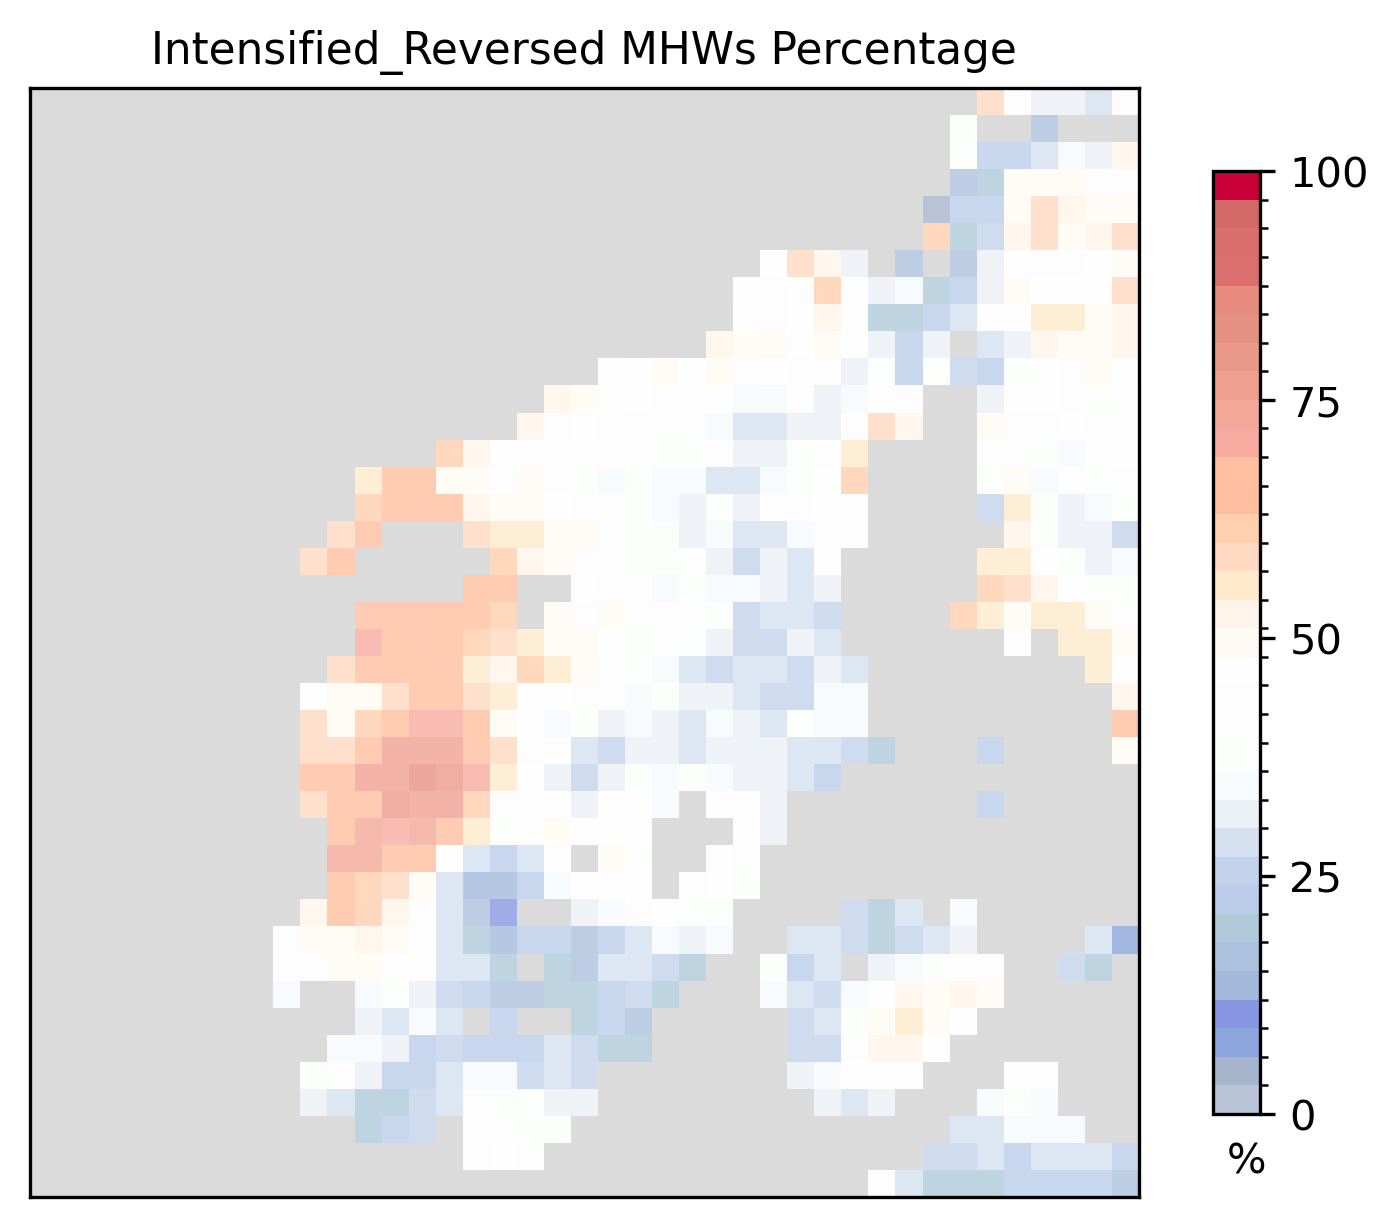

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = Intensified_percentage
data = np.where(data==0, np.nan, data)

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d', '#c70039'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([0, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27,
                     0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48,
                     0.51, 0.54, 0.57, 0.60, 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81,
                     0.84, 0.87, 0.90, 0.93,0.96,1], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, alpha=0.8)

# Add the color bar with the custom color map

cbar = plt.colorbar(sm, shrink=0.85)
cbar.set_ticks([0,0.25,0.5, 0.75,  1])  # Optional: Set custom ticks
cbar.set_ticklabels([0,25,50, 75, 100])  # Optional: Set custom tick labels

# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E']) 
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N'])  
plt.xticks([])
plt.yticks([])
plt.title('Intensified_Reversed MHWs Percentage', fontsize = 10.5)

cbar.set_label('%', rotation=0, labelpad=-40)  
cbar.ax.yaxis.set_label_coords(0.7, -0.03)

plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

In [35]:
Intensified_percentage

array([[       nan,        nan,        nan, ..., 0.325     , 0.2972973 ,
        0.43137255],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.34745763, 0.32142857,
        0.51851852],
       ...,
       [0.        , 0.        , 0.        , ..., 0.34883721,        nan,
               nan],
       [0.        , 0.        , 0.        , ..., 0.28688525, 0.28099174,
        0.23015873],
       [0.        , 0.        , 0.        , ..., 0.21296296, 0.22321429,
        0.17073171]])

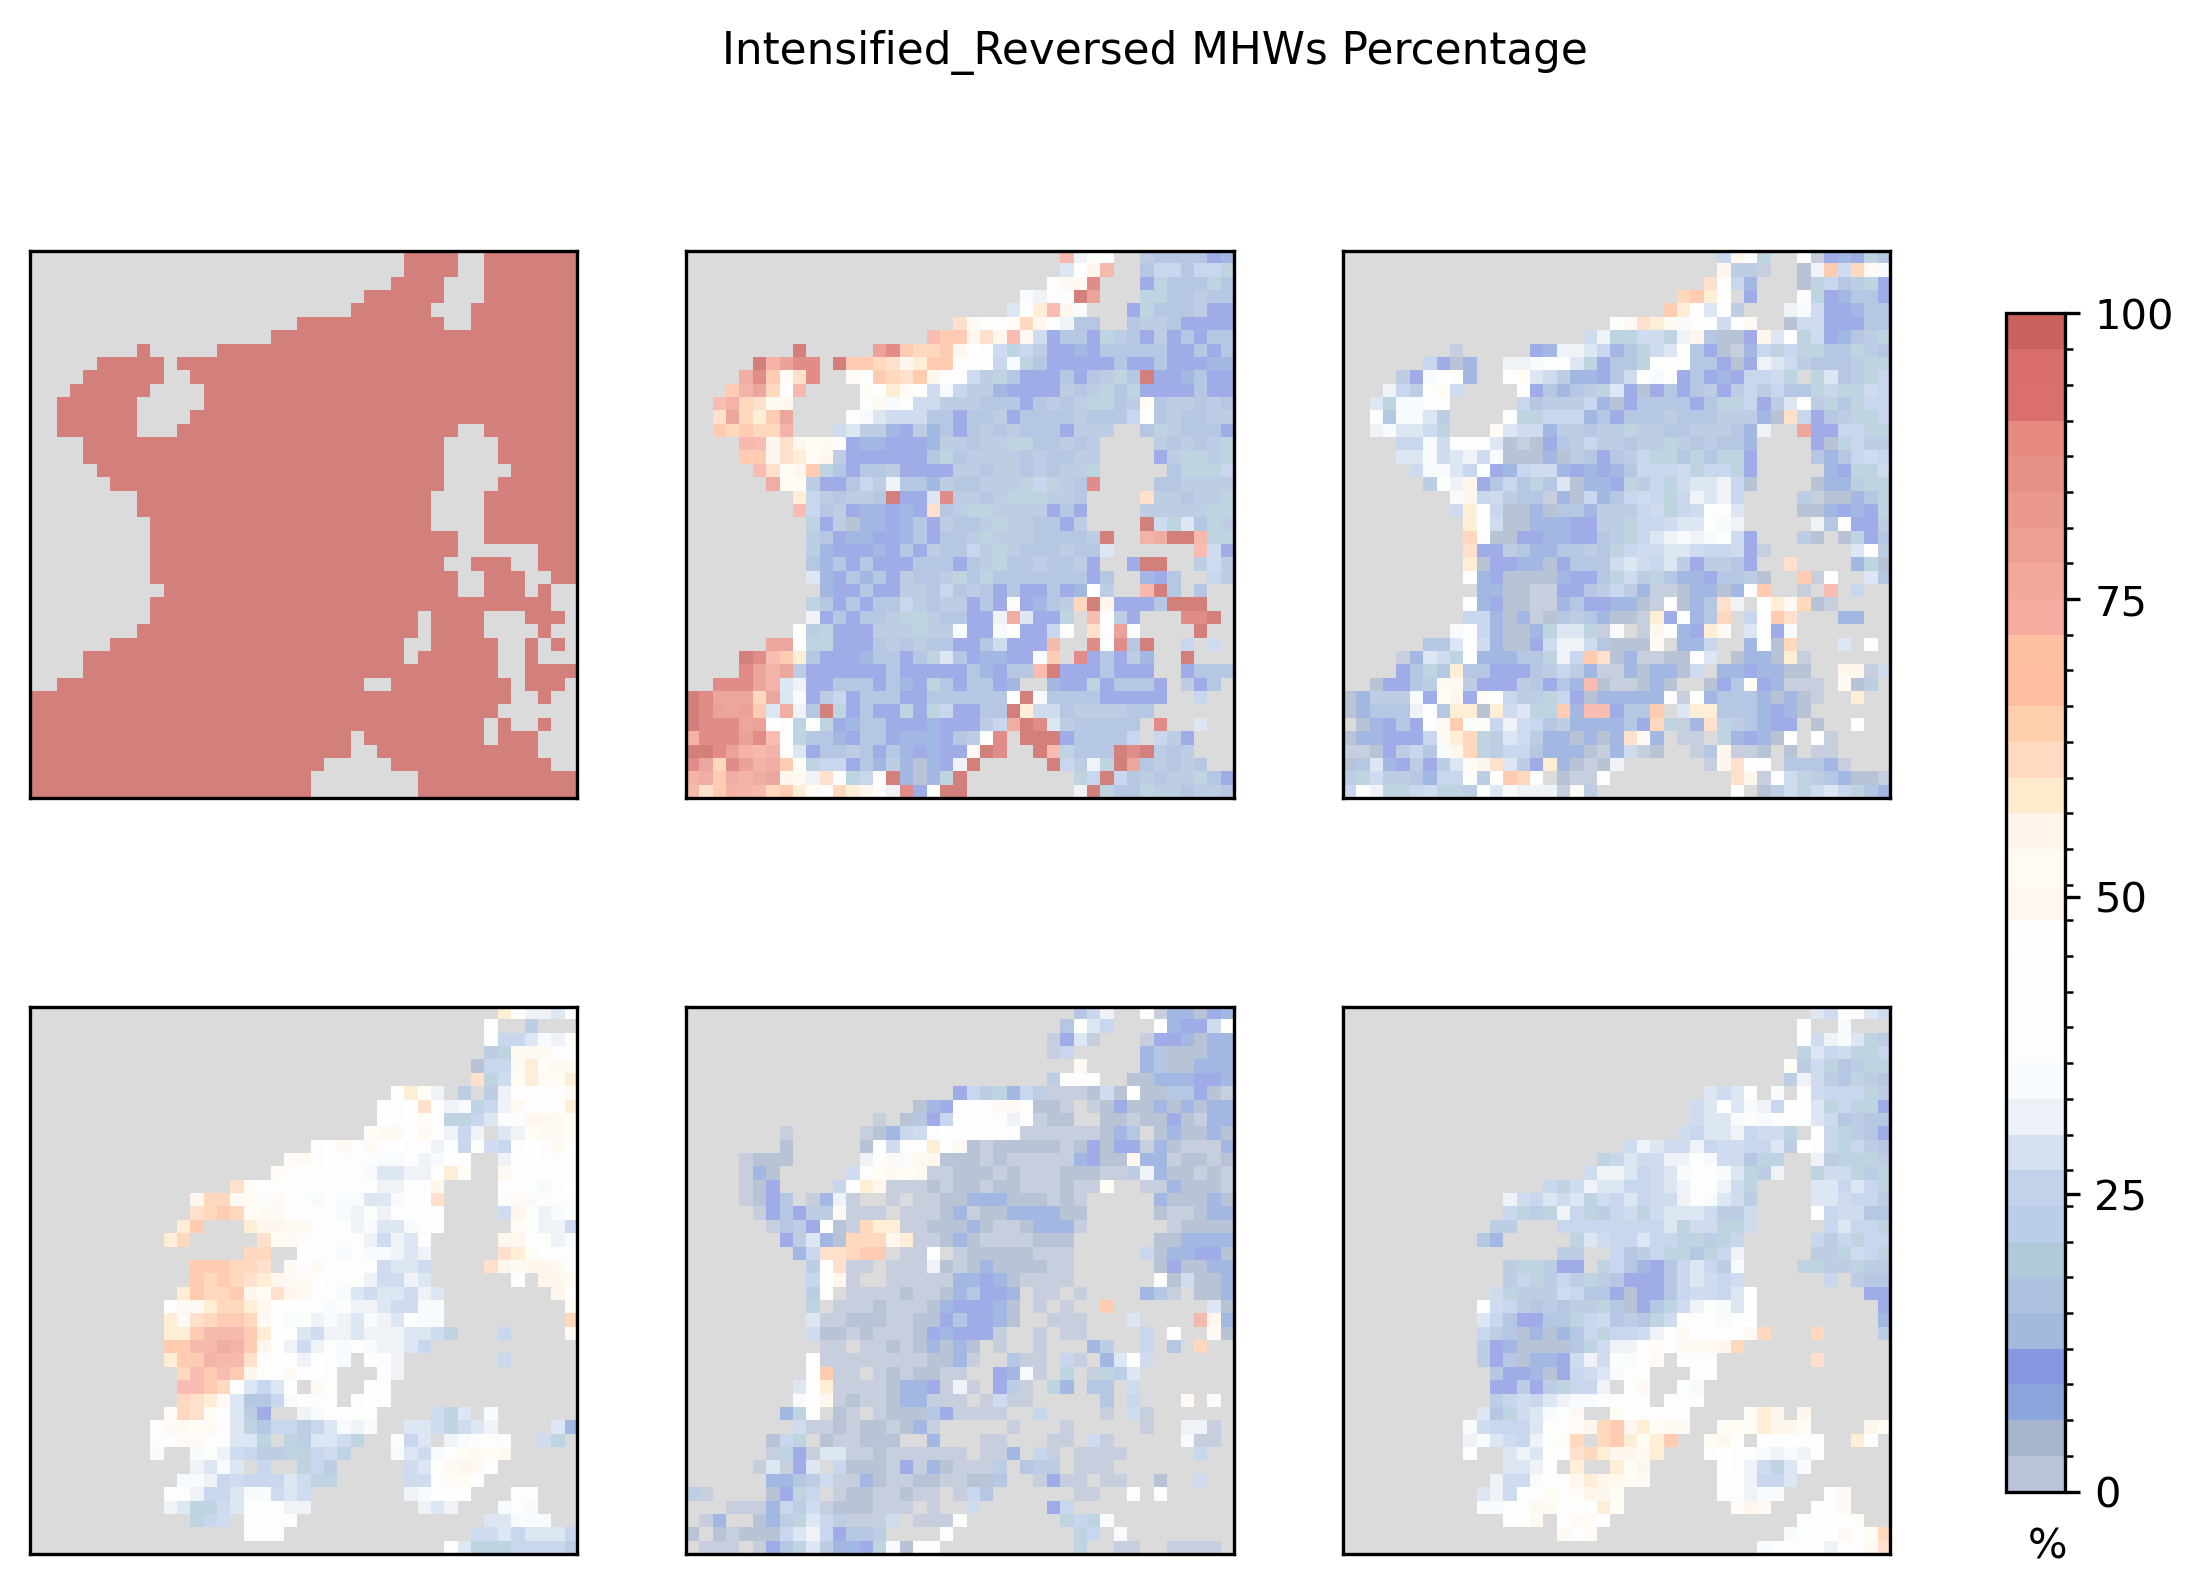

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

fig, axs = plt.subplots(2, 3, figsize=(10, 6), dpi=300)

data1 = MHW_events1
data2 = Shallow_percentage
data3 = Reversed_percentage
data4 = Intensified_percentage
data5 = Deep_percentage
data6 = Intensified_Reversed_percentage

data2 = np.where(data2==0, np.nan, data2)
data3 = np.where(data3==0, np.nan, data3)
data4 = np.where(data4==0, np.nan, data4)
data5 = np.where(data5==0, np.nan, data5)
data6 = np.where(data6==0, np.nan, data6)

colors =['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')

norm = BoundaryNorm([0, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.60, 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.90, 0.93,0.96,1], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        if i == 0:
            data = globals()['data'+str(j+1)]  
        else:
            data = globals()['data'+str(j+4)] 
        ax.imshow(data, cmap=cmap_custom, norm=norm, alpha=0.8)

        ax.set_xticks([])
        ax.set_yticks([])

cbar = fig.colorbar(sm, ax=axs, shrink=0.85)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels([0, 25, 50, 75, 100])
cbar.set_label('%', rotation=0, labelpad=-40)
cbar.ax.yaxis.set_label_coords(0.7, -0.03)

plt.suptitle('Intensified_Reversed MHWs Percentage', fontsize=10.5)

plt.show()

In [42]:
Shallow_percentage.shape

(41, 41)

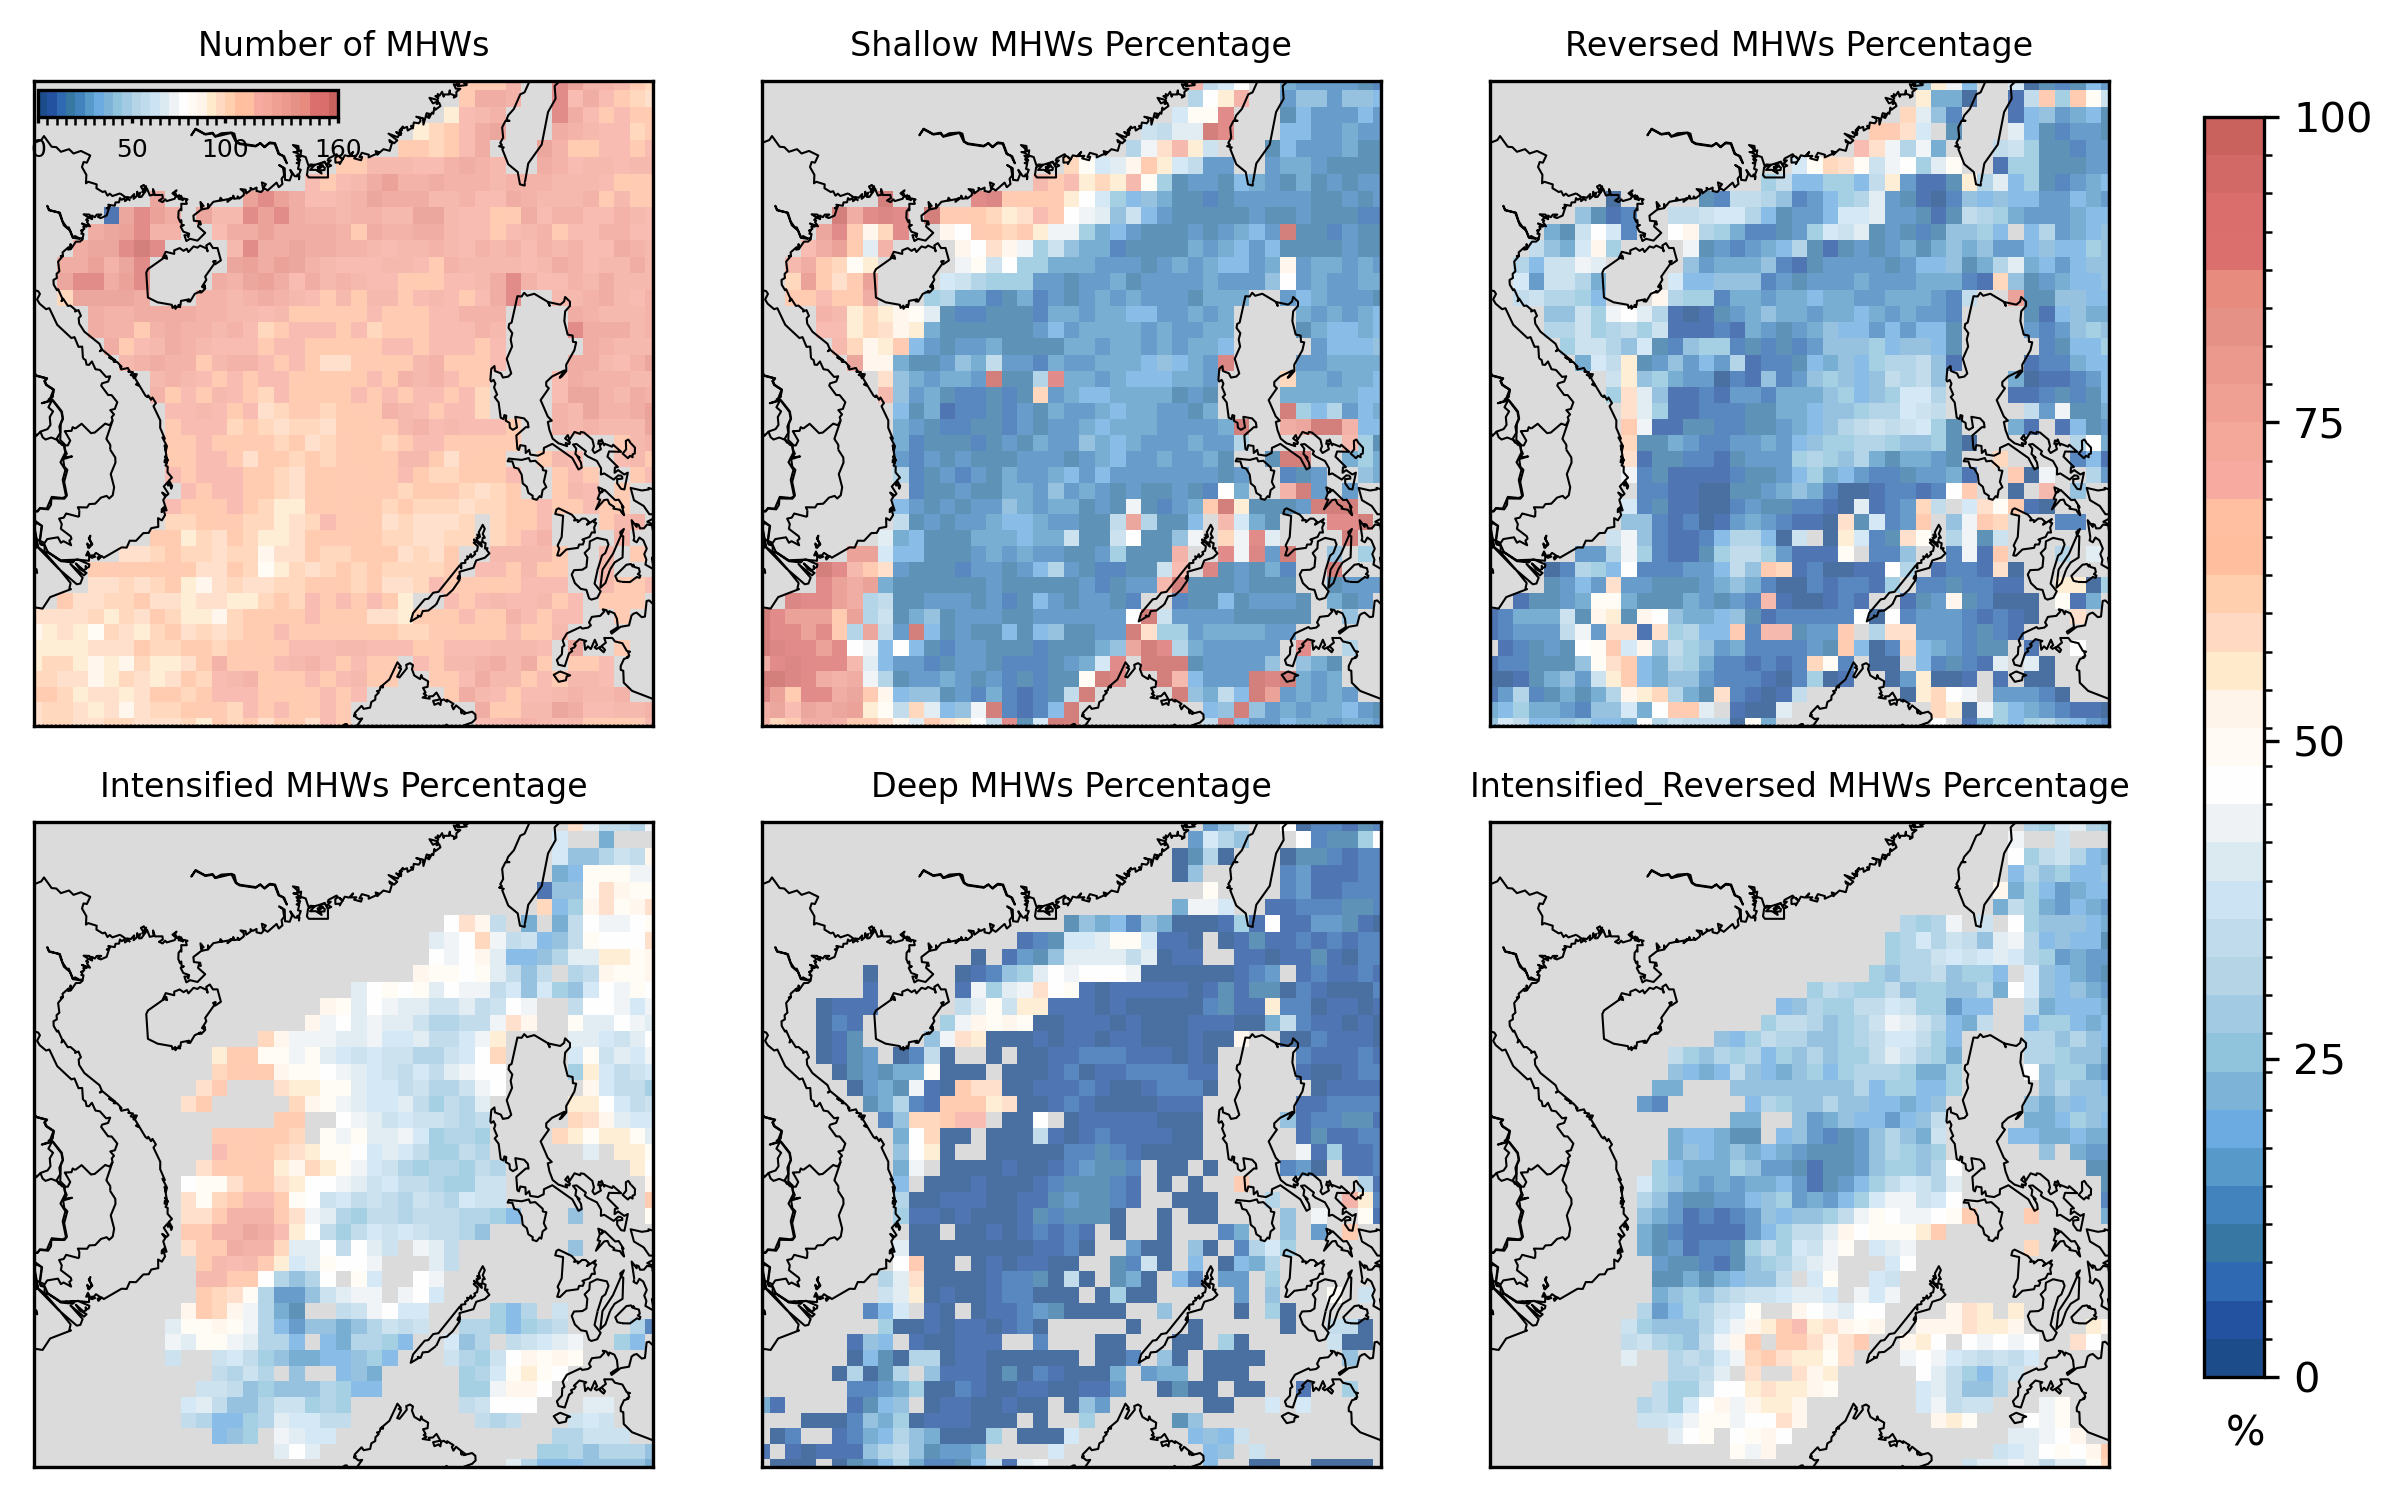

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 6), dpi=300)

data1 = MHW_events1
data2 = Shallow_percentage
data3 = Reversed_percentage
data4 = Intensified_percentage
data5 = Deep_percentage
data6 = Intensified_Reversed_percentage

data2 = np.where(data2==0, np.nan, data2)
data3 = np.where(data3==0, np.nan, data3)
data4 = np.where(data4==0, np.nan, data4)
data5 = np.where(data5==0, np.nan, data5)
data6 = np.where(data6==0, np.nan, data6)

colors = ['#1d4c8b', '#2352A0', '#2f69b1', '#3677a4', '#4283bd', '#579ac9', '#6cabe2', '#7db3d7', '#8fc4dc',
'#a2cbe3', '#b5d4e6', '#c0dbec', '#cbe3f3', '#dbe9f1','#eef2f5',
          '#fefefe',
'#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')

norm_data1 = BoundaryNorm([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155,160], cmap_custom.N)
sm_data1 = cm.ScalarMappable(cmap=cmap_custom, norm=norm_data1)
sm_data1.set_array([])

norm_data2 = BoundaryNorm([0, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.60, 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.90, 0.93,0.96,1], cmap_custom.N)
sm_data2 = cm.ScalarMappable(cmap=cmap_custom, norm=norm_data2)
sm_data2.set_array([])

ax1.imshow(data1, cmap=cmap_custom, norm=norm_data1, alpha=0.8)
ax2.imshow(data2, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax3.imshow(data3, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax4.imshow(data4, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax5.imshow(data5, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax6.imshow(data6, cmap=cmap_custom, norm=norm_data2, alpha=0.8)

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])


from mpl_toolkits.basemap import Basemap
lon, lat = np.meshgrid(np.linspace(105, 125, 41), np.linspace(25, 5, 41))

m1 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25,
            resolution='l', ax=ax1)
m2 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25,
            resolution='l', ax=ax2)
m3 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25,
            resolution='l', ax=ax3)
m4 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25,
            resolution='l', ax=ax4)
m5 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25,
            resolution='l', ax=ax5)
m6 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25,
            resolution='l', ax=ax6)

m1.drawcoastlines(linewidth=0.5)
m1.drawcountries()
m1.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=2)
m1.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=2)

x, y = m1(lon, lat)
m1.pcolormesh(x,y,data1, cmap=cmap_custom, norm=norm_data1, alpha=0.8)


m2.drawcoastlines(linewidth=0.5)
m2.drawcountries()
m2.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=2)
m2.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=2)

x, y = m2(lon, lat)
m2.pcolormesh(x,y,data2, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


m3.drawcoastlines(linewidth=0.5)
m3.drawcountries()
m3.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=2)
m3.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=2)

x, y = m3(lon, lat)
m3.pcolormesh(x,y,data3, cmap=cmap_custom, norm=norm_data2, alpha=0.8)

m4.drawcoastlines(linewidth=0.5)
m4.drawcountries()
m4.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=2)
m4.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=2)

x, y = m4(lon, lat)
m4.pcolormesh(x,y,data4, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


m5.drawcoastlines(linewidth=0.5)
m5.drawcountries()
m5.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=2)
m5.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=2)

x, y = m5(lon, lat)
m5.pcolormesh(x,y,data5, cmap=cmap_custom, norm=norm_data2, alpha=0.8)

m6.drawcoastlines(linewidth=0.5)
m6.drawcountries()
m6.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=2)
m6.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=2)

x, y = m6(lon, lat)
m6.pcolormesh(x,y,data6, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


plt.subplots_adjust(right=0.88)  

cbar_ax = fig.add_axes([0.88, 0.16, 0.02, 0.7])  
cbar = fig.colorbar(sm_data2, cax=cbar_ax, shrink=0.85)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels([0, 25, 50, 75, 100])
cbar.set_label('%', rotation=0, labelpad=-40)
cbar.ax.yaxis.set_label_coords(0.7, -0.03)


cbar_ax2 = fig.add_axes([0.158, 0.86, 0.1, 0.015])  
cbar2 = fig.colorbar(sm_data1, cax=cbar_ax2, orientation='horizontal')
cbar2.set_ticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155,160])
cbar2.set_ticks([0, 50,  100, 160])
cbar2.set_ticklabels([0, 50, 100,  160])
cbar2.ax.tick_params(labelsize=6, length=1.5)
# cbar2.set_label('Data 1 Colorbar')

plt.subplots_adjust(wspace=-0.1, hspace=0.15)  


ax1.imshow(data1, cmap=cmap_custom, norm=norm_data1, alpha=0.8)
ax1.set_title('Number of MHWs', fontdict={'fontsize': 8})

ax2.imshow(data2, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax2.set_title('Shallow MHWs Percentage',fontdict={'fontsize': 8})

ax3.imshow(data3, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax3.set_title('Reversed MHWs Percentage',fontdict={'fontsize': 8})

ax4.imshow(data4, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax4.set_title('Intensified MHWs Percentage',fontdict={'fontsize': 8})

ax5.imshow(data5, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax5.set_title('Deep MHWs Percentage',fontdict={'fontsize': 8})

ax6.imshow(data6, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax6.set_title('Intensified_Reversed MHWs Percentage',fontdict={'fontsize': 8})

# plt.suptitle('Intensified_Reversed MHWs Percentage', fontsize=10.5)

plt.show()

In [38]:
1

1

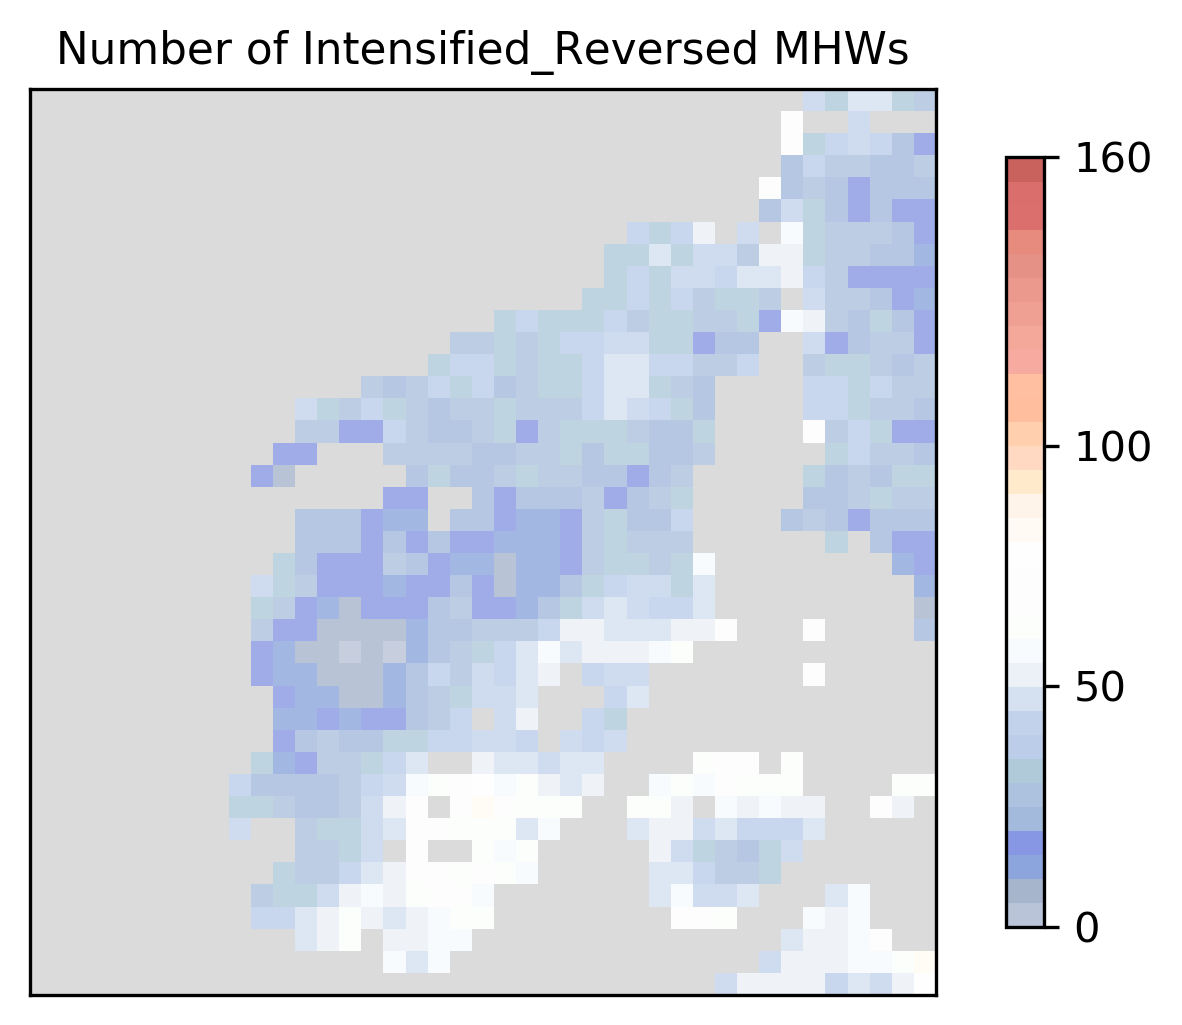

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = count_array[:,:,4]
data = np.where(data==0, np.nan, data)

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([0, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                     50, 55, 60, 65, 70, 75, 80,
                     85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135,
                     140, 145, 150, 155,160], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, alpha=0.8)

# Add the color bar with the custom color map

cbar = plt.colorbar(sm, shrink=0.85)
cbar.set_ticks([0,50, 100,  160])  # Optional: Set custom ticks
cbar.set_ticklabels([0,50, 100, 160])  # Optional: Set custom tick labels

# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E'])  
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N'])  
plt.xticks([])
plt.yticks([])
plt.title('Number of Intensified_Reversed MHWs', fontsize = 10.5)


plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

In [25]:
data_depth = np.load(r'D:\博士工作\统计第二篇_3DMHW_MLD_south\最终位置\temp_diff_clim_93_20.npz')
depth = data_depth['depth'][:]
depth.shape

(55, 1)

In [26]:
def cum_ta(ta, p):
    a, b = ta.shape
    if a == 1 and b > a:
        ta = ta.T

    n = len(p)
    dp = np.empty(n)
    dp[0] = p[0] - 0
    dp[1:] = p[1:] - p[:-1]

    cta = np.empty(n)
    if not np.isnan(cta[0]):
        cta[0] = ta[0] * dp[0]
        for ip in range(1, n):
            if not np.isnan(ta[ip]):
                cta[ip] = ta[ip] * dp[ip] + cta[ip-1]
            else:
                cta[ip] = cta[0]  # Set cta[ip] to cta[0] if ta[ip] is nan
    else:
        cta.fill(np.nan)  # Set all elements of cta to nan if cta[0] is nan
    return cta  

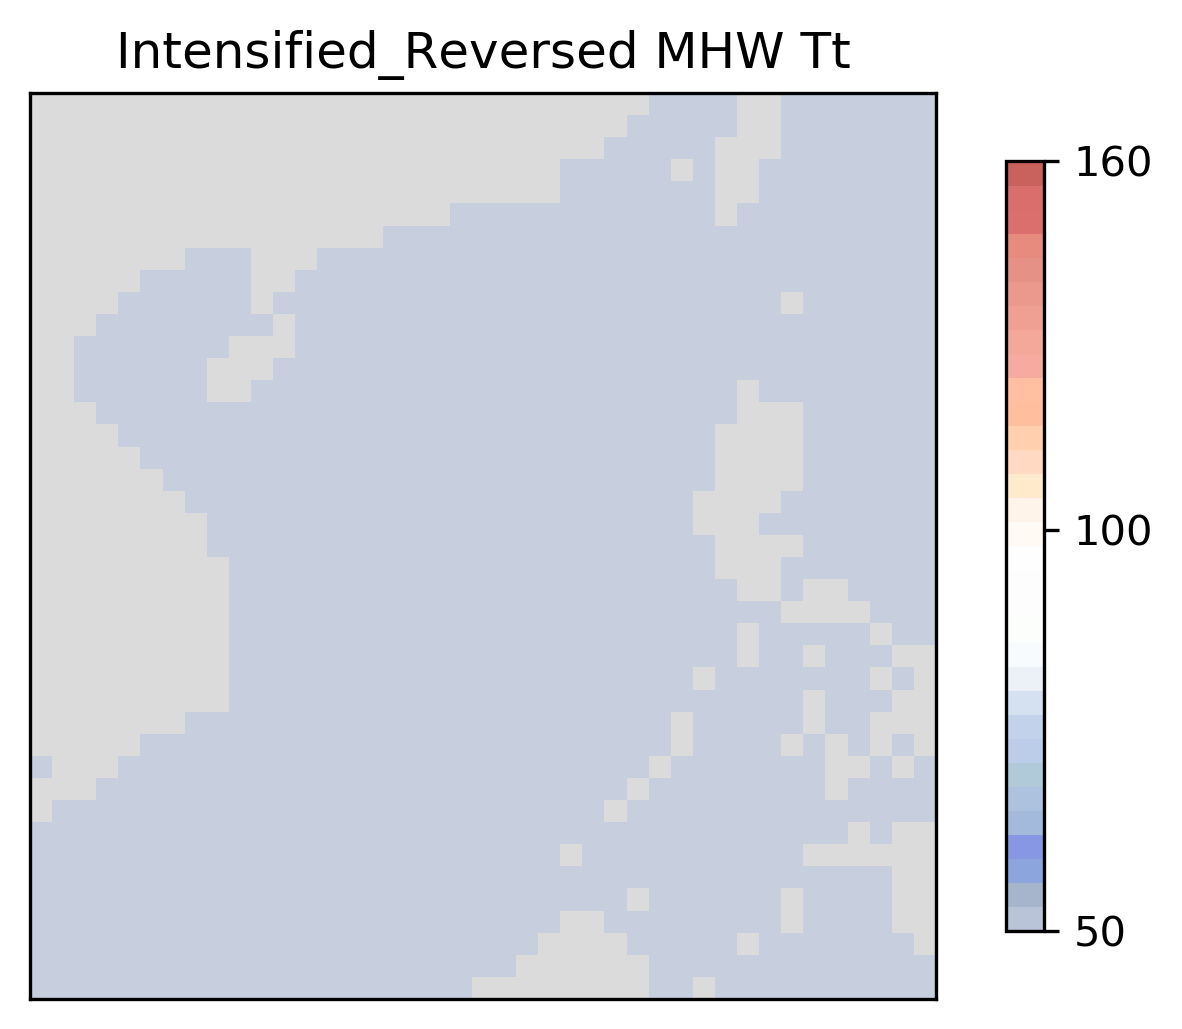

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = temp[0,0,:,:]

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([50, 53, 56, 59, 62, 65, 68, 71, 74, 77,
                     80, 83, 86, 89, 92, 95, 98,
                     101, 104, 107, 110, 113, 116, 119, 122, 125, 130, 135,
                     140, 145, 150, 155,160], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, alpha=0.8)

# Add the color bar with the custom color map

cbar = plt.colorbar(sm, shrink=0.85)
cbar.set_ticks([50, 100,  160])  # Optional: Set custom ticks
cbar.set_ticklabels([50, 100, 160])  # Optional: Set custom tick labels

# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E']) 
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N']) 
plt.xticks([])
plt.yticks([])
plt.title('Intensified_Reversed MHW Tt')
plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

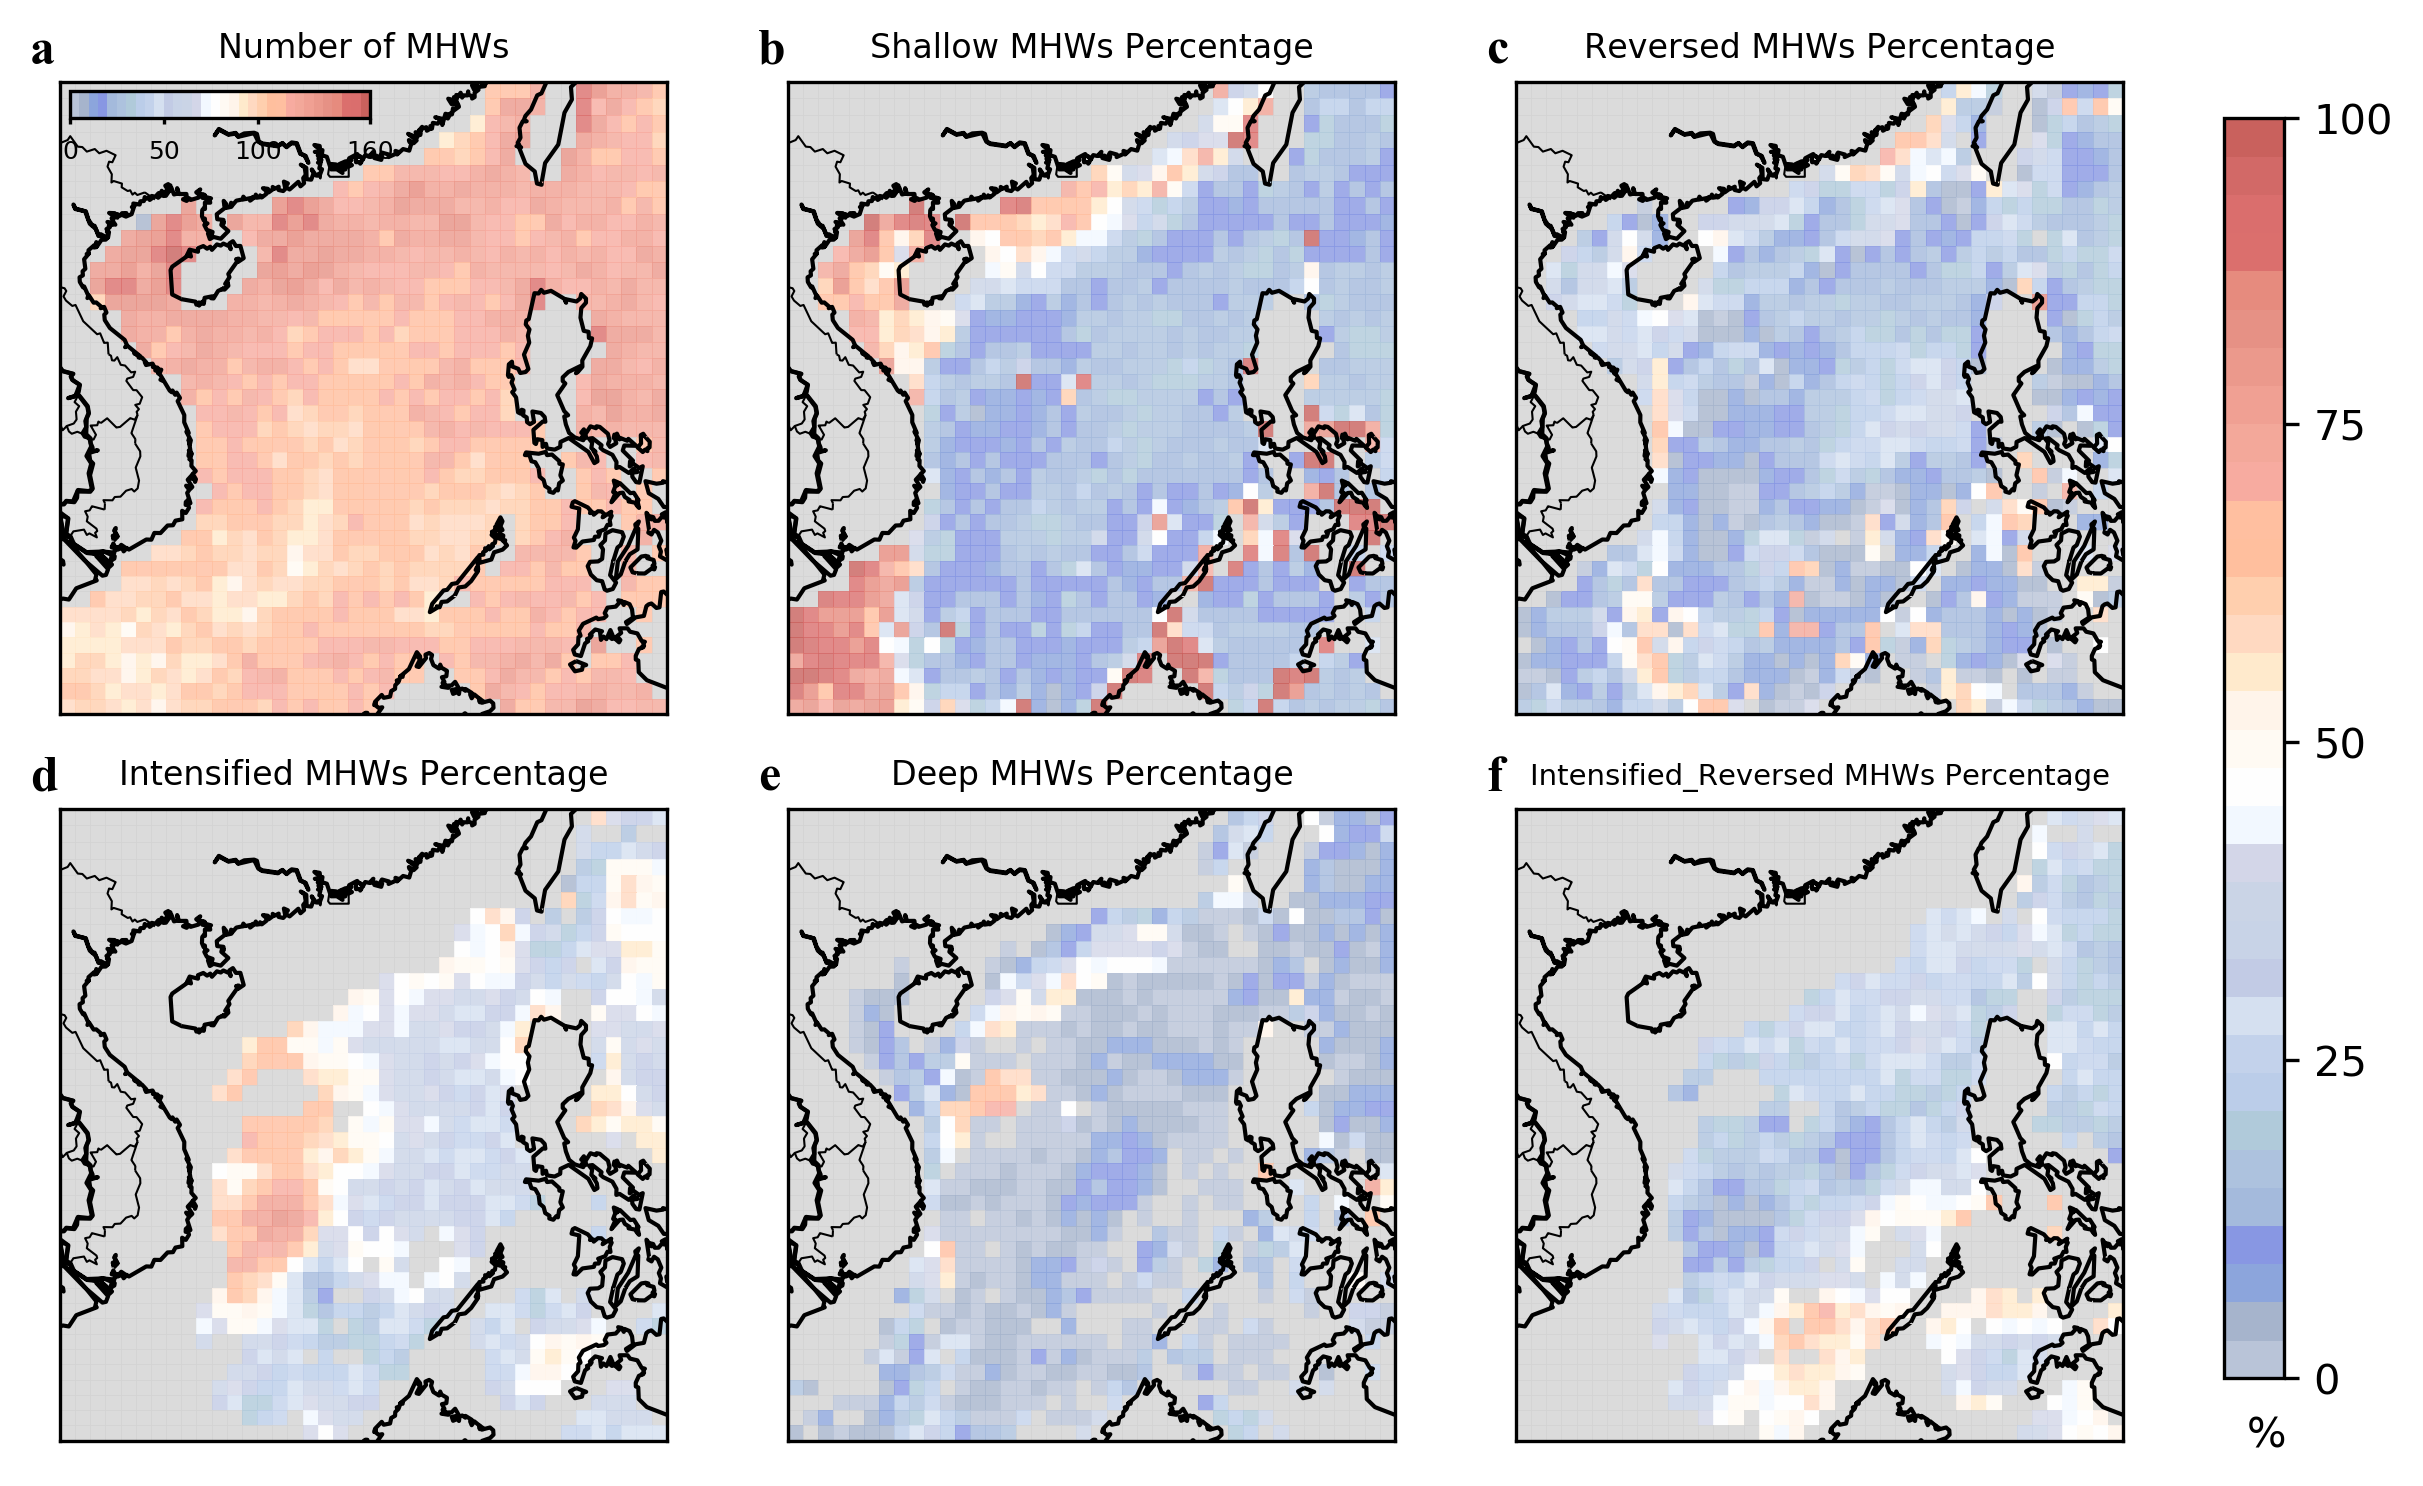

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 6), dpi=300)

data1 = MHW_events1
data2 = Shallow_percentage
data3 = Reversed_percentage
data4 = Intensified_percentage
data5 = Deep_percentage
data6 = Intensified_Reversed_percentage

data2 = np.where(data2==0, np.nan, data2)
data3 = np.where(data3==0, np.nan, data3)
data4 = np.where(data4==0, np.nan, data4)
data5 = np.where(data5==0, np.nan, data5)
data6 = np.where(data6==0, np.nan, data6)

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', 
          '#bbcde9', '#c3d2eb', '#d5e0f0', '#c2cbe5', '#c8d3e7', '#cad4e6', '#d3d6e8','#f2f8ff','#fefefe',
'#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')

norm_data1 = BoundaryNorm([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155,160], cmap_custom.N)
sm_data1 = cm.ScalarMappable(cmap=cmap_custom, norm=norm_data1)
sm_data1.set_array([])

norm_data2 = BoundaryNorm([0, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.60, 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.90, 0.93,0.96,1], cmap_custom.N)
sm_data2 = cm.ScalarMappable(cmap=cmap_custom, norm=norm_data2)
sm_data2.set_array([])

ax1.imshow(data1, cmap=cmap_custom, norm=norm_data1, alpha=0.8)
ax2.imshow(data2, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax3.imshow(data3, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax4.imshow(data4, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax5.imshow(data5, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax6.imshow(data6, cmap=cmap_custom, norm=norm_data2, alpha=0.8)

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])

plt.subplots_adjust(right=0.88)  
# cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  
cbar_ax = fig.add_axes([0.88, 0.16, 0.02, 0.7])  
cbar = fig.colorbar(sm_data2, cax=cbar_ax, shrink=0.85)
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels([0, 25, 50, 75, 100])
cbar.set_label('%', rotation=0, labelpad=-40)
cbar.ax.yaxis.set_label_coords(0.7, -0.03)


cbar_ax2 = fig.add_axes([0.162, 0.86, 0.1, 0.015])  
cbar2 = fig.colorbar(sm_data1, cax=cbar_ax2, orientation='horizontal')
cbar2.set_ticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155,160])
cbar2.set_ticks([0, 50,  100, 160])
cbar2.set_ticklabels([0, 50, 100,  160])
cbar2.ax.tick_params(labelsize=6, length=1.5)
# cbar2.set_label('Data 1 Colorbar')

plt.subplots_adjust(wspace=-0.1, hspace=0.15)  


ax1.imshow(data1, cmap=cmap_custom, norm=norm_data1, alpha=0.8)
ax1.set_title('Number of MHWs', fontdict={'fontsize': 8})

ax2.imshow(data2, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax2.set_title('Shallow MHWs Percentage',fontdict={'fontsize': 8})

ax3.imshow(data3, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax3.set_title('Reversed MHWs Percentage',fontdict={'fontsize': 8})

ax4.imshow(data4, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax4.set_title('Intensified MHWs Percentage',fontdict={'fontsize': 8})

ax5.imshow(data5, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax5.set_title('Deep MHWs Percentage',fontdict={'fontsize': 8})

ax6.imshow(data6, cmap=cmap_custom, norm=norm_data2, alpha=0.8)
ax6.set_title('Intensified_Reversed MHWs Percentage',fontdict={'fontsize': 7})

# plt.suptitle('Intensified_Reversed MHWs Percentage', fontsize=10.5)


from mpl_toolkits.basemap import Basemap
lon, lat = np.meshgrid(np.linspace(105, 125, 41), np.linspace(25, 5, 41))

m1 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25, 
            resolution='l', ax=ax1)
m2 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25, 
            resolution='l', ax=ax2)
m3 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25, 
            resolution='l', ax=ax3)
m4 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25, 
            resolution='l', ax=ax4)
m5 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25, 
            resolution='l', ax=ax5)
m6 = Basemap(projection='merc', llcrnrlon=105, urcrnrlon=125, llcrnrlat=5, urcrnrlat=25, 
            resolution='l', ax=ax6)

m1.drawcoastlines()
m1.drawcountries()
m1.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=8)
m1.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=8)

x, y = m1(lon, lat)
m1.pcolormesh(x,y,data1, cmap=cmap_custom, norm=norm_data1, alpha=0.8)


m2.drawcoastlines()
m2.drawcountries()
m2.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=8)
m2.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=8)

x, y = m2(lon, lat)
m2.pcolormesh(x,y,data2, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


m3.drawcoastlines()
m3.drawcountries()
m3.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=8)
m3.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=8)

x, y = m3(lon, lat)
m3.pcolormesh(x,y,data3, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


m4.drawcoastlines()
m4.drawcountries()
m4.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=8)
m4.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=8)

x, y = m4(lon, lat)
m4.pcolormesh(x,y,data4, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


m5.drawcoastlines()
m5.drawcountries()
m5.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=8)
m5.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=8)

x, y = m5(lon, lat)
m5.pcolormesh(x,y,data5, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


m6.drawcoastlines()
m6.drawcountries()
m6.drawparallels(np.arange(5, 25, 41), linewidth=0.5, color='k', fontsize=8)
m6.drawmeridians(np.arange(105, 125, 41),  linewidth=0.5, color='k', fontsize=8)

x, y = m6(lon, lat)
m6.pcolormesh(x,y,data6, cmap=cmap_custom, norm=norm_data2, alpha=0.8)


ax1.text(-0.05, 1.03, 'a', transform=ax1.transAxes, fontsize=12, fontweight='bold', fontname='Times New Roman')
ax2.text(-0.05, 1.03, 'b', transform=ax2.transAxes, fontsize=12, fontweight='bold', fontname='Times New Roman')
ax3.text(-0.05, 1.03, 'c', transform=ax3.transAxes, fontsize=12, fontweight='bold', fontname='Times New Roman')
ax4.text(-0.05, 1.03, 'd', transform=ax4.transAxes, fontsize=12, fontweight='bold', fontname='Times New Roman')
ax5.text(-0.05, 1.03, 'e', transform=ax5.transAxes, fontsize=12, fontweight='bold', fontname='Times New Roman')
ax6.text(-0.05, 1.03, 'f', transform=ax6.transAxes, fontsize=12, fontweight='bold', fontname='Times New Roman')

plt.show()

In [57]:
data1

array([[ nan,  nan,  nan, ..., 120., 111., 102.],
       [ nan,  nan,  nan, ..., 110., 102.,  96.],
       [ nan,  nan,  nan, ..., 118., 112., 108.],
       ...,
       [106., 105., 100., ..., 129.,  nan,  nan],
       [ 97., 100., 103., ..., 122., 121., 126.],
       [ 99., 101., 100., ..., 108., 112., 123.]])